### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [348]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [351]:
data = pd.read_csv('data/coupons.csv')

In [353]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [355]:
data.sample(15)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12364,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,31,Single,...,4~8,less1,4~8,1~3,1,0,0,1,0,0
932,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Female,31,Single,...,4~8,4~8,4~8,4~8,1,0,0,0,1,0
10257,No Urgent Place,Kid(s),Sunny,80,2PM,Coffee House,1d,Female,31,Married partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
8129,No Urgent Place,Friend(s),Sunny,55,10AM,Coffee House,1d,Male,31,Single,...,never,gt8,1~3,never,1,1,0,0,1,0
11499,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,below21,Single,...,1~3,less1,4~8,gt8,1,1,0,0,1,1
2262,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,never,1~3,less1,never,1,0,0,1,0,0
10844,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,21,Single,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
5418,No Urgent Place,Alone,Sunny,80,2PM,Restaurant(<20),2h,Female,26,Single,...,NaN,1~3,1~3,less1,1,1,0,0,1,1
2656,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,26,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
10357,Work,Alone,Sunny,80,7AM,Restaurant(<20),1d,Male,21,Single,...,4~8,less1,never,never,1,0,0,0,1,1


2. Investigate the dataset for missing or problematic data.

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
destination              0.00
passanger                0.00
weather                  0.00
temperature              0.00
time                     0.00
coupon                   0.00
expiration               0.

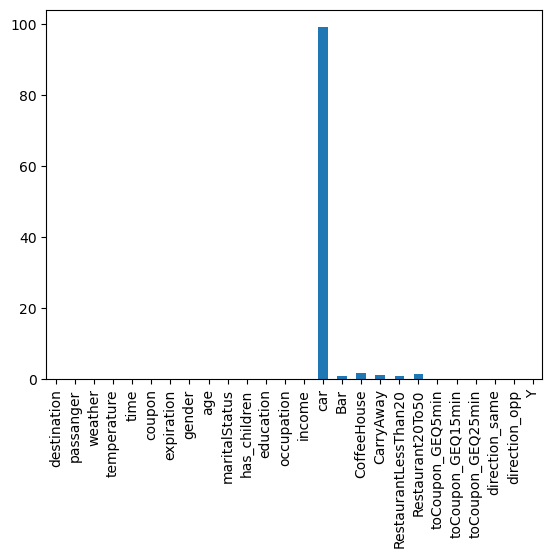

In [358]:
# Determine cells that contain missing data and sum the columns that have missing data
data.isna()
data_missing = data.isna().sum()
print(data_missing)

# Determining the percentages of missing data and bar plot the data 
data_missing_percent = data.isna().mean().multiply(100).round(2)
print(data_missing_percent)
data.isna().mean().multiply(100).round(2).plot(kind = 'bar')

# Extract a few columns that has many missing values
datasub1 = data[["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]]
data[["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]].isna()
print(datasub1)

<Axes: >

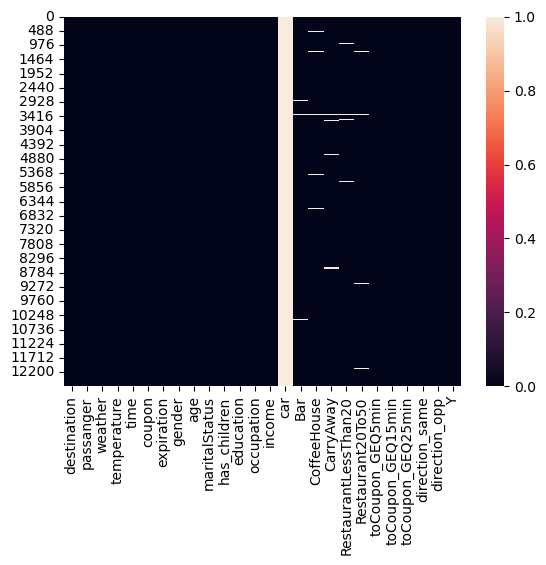

In [360]:
sns.heatmap(data.isna())

3. Decide what to do about your missing data -- drop, replace, other...

In [363]:
# Since the car column doesn't give much information I will drop it
data1 = data.drop(["car"], axis = 1)
data1.head()

# Replace NaN in CarryAway column with empty 
data1["CarryAway"] = data1["CarryAway"].fillna("")
data1.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,,4~8,1~3,1,1,0,0,1,0


In [365]:
# Replace NaN in the remaining columns "Bar", "CoffeeHouse", "RestaurantLessThan20", "Restaurant20To50"
cols_to_clean = ["Bar", "CoffeeHouse", "RestaurantLessThan20", "Restaurant20To50"]
data1[cols_to_clean] = data1[cols_to_clean].fillna("")
data1.head()



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [368]:
# Sum the column Z for the Y=1, determine total coupons offered, and find the proportion
coupon_accepted = data1["Y"].sum()
total_coupons_offered = data1["Y"].count()
data1.info()
prop_coupon_accepted = coupon_accepted / total_coupons_offered
print("Proportion of coupons accepted:", prop_coupon_accepted)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

5. Use a bar plot to visualize the `coupon` column.

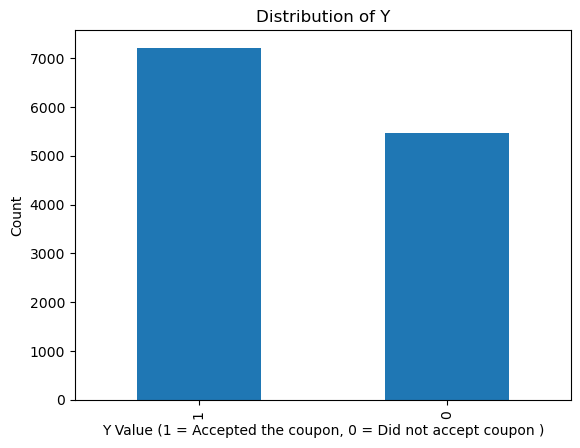

In [371]:
# Plotting using matplotlib
data1['Y'].value_counts().plot(kind='bar')
plt.xlabel('Y Value (1 = Accepted the coupon, 0 = Did not accept coupon )')
plt.ylabel('Count')
plt.title('Distribution of Y')
plt.show()


6. Use a histogram to visualize the temperature column.

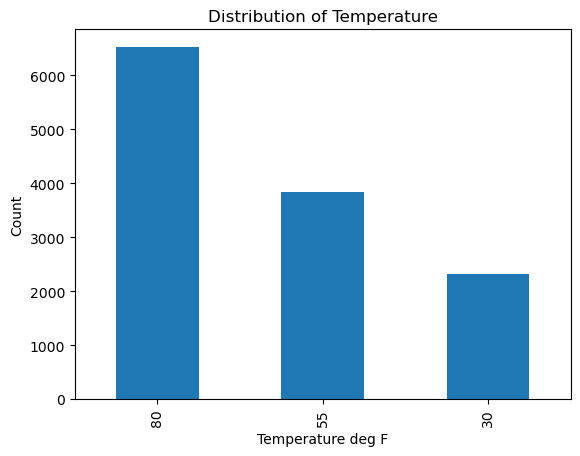

In [374]:
data1['temperature'].value_counts().plot(kind='bar')
plt.xlabel('Temperature deg F')
plt.ylabel('Count')
plt.title('Distribution of Temperature')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [381]:
# Extract the coupon and Y columns 
Data_Bar = data1[["coupon", "Y"]]
Data_Bar.info()
Data_Bar.head()

# In the coupon column extract only rows with the string Bar
Data_Bar = Data_Bar[Data_Bar["coupon"] == "Bar"]
Data_Bar.sample(30)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   coupon  12684 non-null  object
 1   Y       12684 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 198.3+ KB


,coupon,Y
5449,Bar,0
2736,Bar,0
11890,Bar,1
9695,Bar,1
8467,Bar,0
11188,Bar,1
9898,Bar,1
9781,Bar,1
4261,Bar,1
3215,Bar,0


2. What proportion of bar coupons were accepted?


In [384]:
# Sum the Row containing Y=1 and divide by the total to get the proportion

bar_coupon_accepted = Data_Bar["Y"].sum()
total_bar_coupons = Data_Bar["Y"].count()
prop_bar_coupon_accepted = bar_coupon_accepted / total_bar_coupons
print("Proportion of bar coupons accepted:", prop_bar_coupon_accepted.round(5))


Proportion of bar coupons accepted: 0.41001


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [387]:
# Groupby the data for the people who went to bar and the acceptance rate. This gives the sum and mean for each category
sum_all_Bar = data1.groupby("Bar")["Y"].sum().round(3).sort_values()
mean_all_bar = data1.groupby("Bar")["Y"].mean().round(3).sort_values()

print("The sum for Bar group:", sum_all_Bar)
print("The averages for the Bar group:", mean_all_bar)

# Sum specific rows
total_bar_less_three = sum_all_Bar.loc[["never", "less1", "1~3"]].sum()
total_bar_more_three = sum_all_Bar.loc[["gt8", "4~8"]].sum()
total_bar = total_bar_less_three + total_bar_more_three

print("The total of acceptance for people who went to a bar 3 or fewer times a month:", total_bar_less_three)
print("The total of acceptance for people who went to a bar more than 3 times a month:", total_bar_more_three)
print("The ratio of the people who accepted the coupon who went to the bar < 3 times a month:", (total_bar_less_three / total_bar).round(3))


The sum for Bar group: Bar
           55
gt8       201
4~8       686
1~3      1538
less1    1963
never    2767
Name: Y, dtype: int64
The averages for the Bar group: Bar
         0.514
never    0.532
less1    0.564
gt8      0.576
1~3      0.622
4~8      0.638
Name: Y, dtype: float64
The total of acceptance for people who went to a bar 3 or fewer times a month: 6268
The total of acceptance for people who went to a bar more than 3 times a month: 887
The ratio of the people who accepted the coupon who went to the bar < 3 times a month: 0.876


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [390]:
# Groupby frequency to Bar, age and coupon acceptance and sum the sorted values
data1.groupby(["Bar", "age"])["Y"].sum().round(2).sort_values()

# Create a results variable 
results = data1.groupby(["Bar", "age"])["Y"].sum().round(2).sort_values()

# Filter: drivers over 25 who go to a bar more than once/month
group1 = data1[(data1["Bar"].isin(["1~3", "4~8", "gt8"])) & (data1["age"].isin(["26", "31", "36", "41", "46", "50plus"]))]

# Everyone else who go to the bar 
group2 = data1[(data1["Bar"].isin(["1~3", "4~8", "gt8", "never", "less1"])) & (data1["age"].isin(["below21", "21", "26", "31", "36", "41", "46", "50plus"]))]

# Compare acceptance rates
rate1 = group1["Y"].mean()
rate2 = group2["Y"].mean()

print("Drivers over 25 who go to a bar more than once/month acceptance rate:", round(rate1, 3))
print("All others acceptance rate:", round(rate2, 3))

Drivers over 25 who go to a bar more than once/month acceptance rate: 0.622
All others acceptance rate: 0.569


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [393]:
# Groupby frequency to Bar, passanger, occupation and coupon acceptance and sum the count and mean
data1.groupby(["Bar", "passanger", "occupation"], as_index = False)["Y"].agg(['count', 'mean']).round(2)

# Define group3 as drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
group3 = data1[(data1["Bar"].isin(["1~3", "4~8", "gt8"])) & (data1["passanger"].isin(["Friend(s)", "Partner"])) & (~data1["occupation"].isin(["Farming Fishing & Forestry"]))]

# Everyone else who go to the bar 
group4 = data1[(data1["Bar"].isin(["1~3", "4~8", "gt8", "never", "less1"])) & (data1["age"].isin(["below21", "21", "26", "31", "36", "41", "46", "50plus"]))]

# Compare acceptance rates
rate3 = group3["Y"].mean()
rate4 = group4["Y"].mean()

print("Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry:", round(rate3, 3))
print("All others acceptance rate:", round(rate4, 3))

Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 0.69
All others acceptance rate: 0.569


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [396]:
# Define group5 as drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
group5 = data1[(data1["Bar"].isin(["1~3", "4~8", "gt8"])) & (data1["passanger"].isin(["Friend(s)", "Partner"])) & (~data1["maritalStatus"].isin(["Widowed"]))]

# Define group6 as drivers who go to bars more than once a month and are under the age of 30 
group6 = data1[(data1["Bar"].isin(["1~3", "4~8", "gt8"])) & (data1["age"].isin(["below21", "21", "26"]))]

# Define group7 as drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
group7 = data1[(data1["RestaurantLessThan20"].isin(["4-8", "gt8"])) & data1["income"].isin(["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"])]

# Compare acceptance rates
rate5 = group5["Y"].mean()
rate6 = group6["Y"].mean()
rate7 = group7["Y"].mean()

print("Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed:", round(rate5, 3))
print("Drivers who go to bars more than once a month and are under the age of 30:", round(rate6, 3))
print("Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K:", round(rate7, 3))


Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.69
Drivers who go to bars more than once a month and are under the age of 30: 0.628
Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.663


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [399]:
# The total acceptance rate of bar coupons: 0.41001 or 41% 
# The acceptance rate of drivers who went to the bar < 3 times a month: 0.876 or 87.6% 
# The acceptance rate of drivers over 25 who go to a bar more than once/month acceptance rate: 0.622 or 62.2% 
# The acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 0.69 or 69%
# The acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.69 or 69%
# The acceptance rate of drivers who go to bars more than once a month and are under the age of 30: 0.628 or 62.8% 
# The acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.663 or 66.3%

# Drivers who go to the bar less than than three times a month are very likely to accept the coupon. All the other categories show an acceptance rates of about 50%, some even as high as 69%

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [402]:
# I will choose to investigate the coffeehouse coupon
# First, I will group by the data on coffeehouse, passenger, occupation and income and determine the count and mean
# This will give me an idea of the acceptance rates for each category
Data_coffeehouse = data1[["CoffeeHouse", "passanger", "occupation", "income"]]
Data_coffeehouse.head()
Data_coffeehouse.sample(30)

data1.groupby(["CoffeeHouse", "passanger", "occupation", "income"], as_index = False)["Y"].agg(['count', 'mean']).round(2).sort_values(by = 'count')

,CoffeeHouse,passanger,occupation,income,count,mean
775,less1,Partner,Installation Maintenance & Repair,$12500 - $24999,1,0.00
802,less1,Partner,Unemployed,$62500 - $74999,1,0.00
434,4~8,Partner,Office & Administrative Support,$75000 - $87499,1,1.00
1010,never,Partner,Life Physical Social Science,$50000 - $62499,1,0.00
1008,never,Partner,Healthcare Practitioners & Technical,$75000 - $87499,1,1.00
...,...,...,...,...,...,...
881,never,Alone,Unemployed,Less than $12500,70,0.44
40,1~3,Alone,Business & Financial,$100000 or More,70,0.61
876,never,Alone,Unemployed,$25000 - $37499,74,0.31
631,less1,Alone,Unemployed,Less than $12500,81,0.59


<Axes: xlabel='CoffeeHouse'>

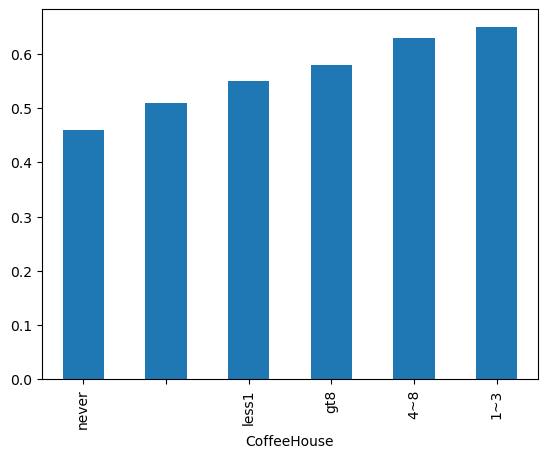

In [404]:
# Next I will plot all the different categories with acceptance rate to understand which factors shows the most acceptance rates of the coupon

data1.groupby("CoffeeHouse")["Y"].mean().round(2).sort_values().plot(kind = "bar")

<Axes: xlabel='passanger'>

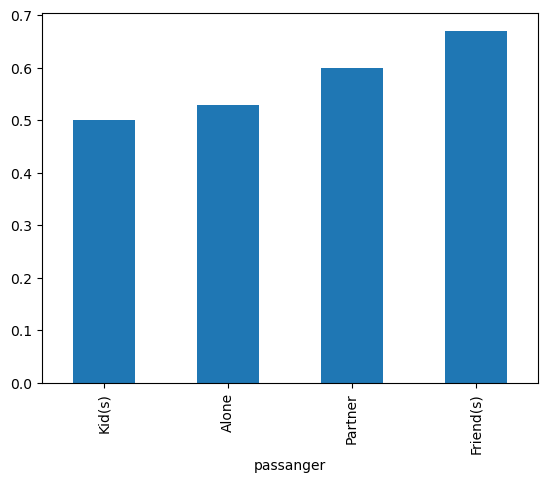

In [406]:
data1.groupby("passanger")["Y"].mean().round(2).sort_values().plot(kind = "bar")


<Axes: xlabel='occupation'>

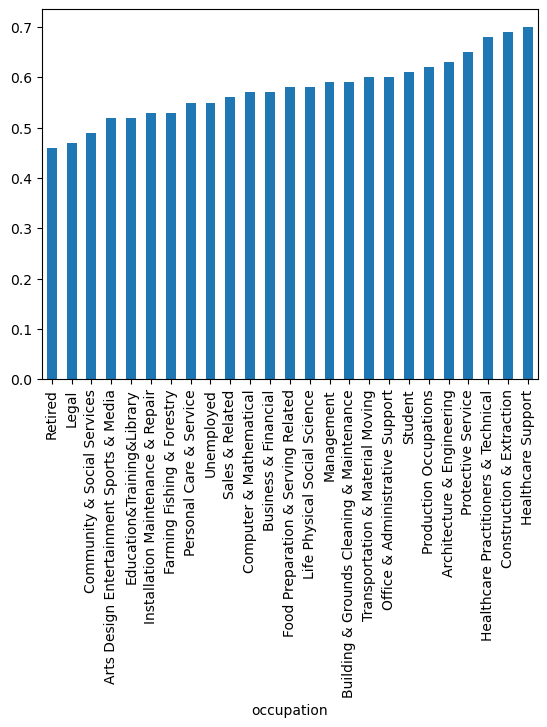

In [408]:
data1.groupby("occupation")["Y"].mean().round(2).sort_values().plot(kind = "bar")

<Axes: xlabel='income'>

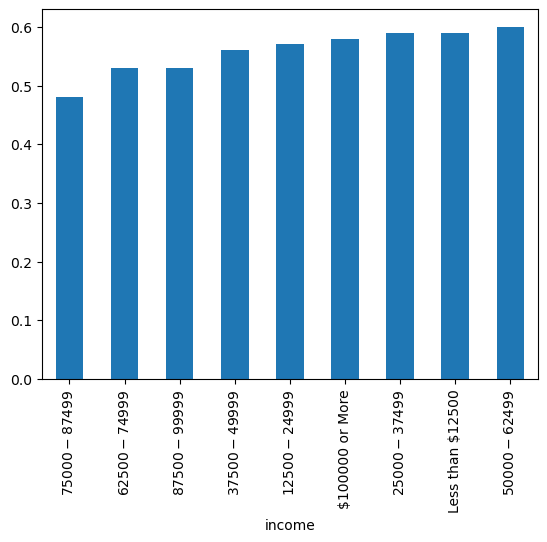

In [410]:
data1.groupby("income")["Y"].mean().round(2).sort_values().plot(kind = "bar")

In [412]:
# # Below is the summary of the plots:
# These are the categories that have the maximum acceptance rates:
# Goes to coffeehouse 1 – 3 times: 0.65
# Goes with friends: 0.68
# Occupation: somewhat uniform with healthcare support being maximum of 0.68
# income: $50,000 - $62,499 at 0.58 